In [1]:
import sys
import os
# sys.path.append(r"Y:\Users\Yingyue\Gates_Lab_Suite-master")
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master")
import data_analysis
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *

from SPAM import *
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/")
from EAB_CB_data_analysis import *
from scipy.optimize import curve_fit
from copy import copy, deepcopy

In [2]:
import json, pickle
import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
# from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc
import itertools

/var/folders/6l/f5pw0tyx785dhvmqpb7282h00000gn/T/ipykernel_24758/3654305878.py:9: DeprecationWarning: The qiskit.extensions module is deprecated since Qiskit 0.46.0. It will be removed in the Qiskit 1.0 release.
  from qiskit.extensions import UnitaryGate


In [3]:

# def rcs_fit_fun(x, a, alpha):
#         #return a * np.exp(-alpha * x)
#         return a * (alpha ** x)

# def fit_EAB_plot(X, xeb_list):
#     Y = [np.mean(xeb_list[L]) for L in X]
#     Yerr = [sem(xeb_list[L]) for L in X]
#     #print(linregress(X,np.log(Y)))
    
    
#     try:
#         params, pcov = curve_fit(rcs_fit_fun, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1,1])
#         alpha = params[1]
#         a=params[0]
#         params_err = np.sqrt(np.diag(pcov))
#         alpha_err = params_err[1]

#     except RuntimeError:
#         alpha = 1.0
#         alpha_err = 0.0


#     return alpha,a, alpha_err,Y, Yerr

# load circuit file

In [4]:
file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=2.txt", 'r')
Lines= file.readlines()
c_d2=[]
count = 0
for line in Lines:
    c_d2.append(line)
    count += 1
print (count)
count=0

# file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=4.txt", 'r')
# Lines= file.readlines()
# c_d4=[]
# count = 0
# for line in Lines:
#     c_d4.append(line)
#     count += 1
# print (count)
# count=0

file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=8.txt", 'r')
Lines= file.readlines()
c_d8=[]
count = 0
for line in Lines:
    c_d8.append(line)
    count += 1
print (count)
count=0

file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=16.txt", 'r')
Lines= file.readlines()
c_d16=[]
count = 0
for line in Lines:
    c_d16.append(line)
    count += 1
print (count)
count=0


file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=32.txt", 'r')
Lines= file.readlines()
c_d32=[]
count = 0
for line in Lines:
    c_d32.append(line)
    count += 1
print (count)
count=0



NameError: name 'load_circuit_file' is not defined

# load 03052024 data  

In [ ]:
paf_data_d2="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240305/2024-03-05 EAB__d=2/"
print (load_eab_data_ordered(paf_data_d2))
filenames_d2,fileIdx_d2=data_analysis.load_datafile_ordered(paf_data_d2)
# print (filenames_d2,fileIdx_d2)

paf_data_d8="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240305/2024-03-05 EAB__d=8/"
filenames_d8,fileIdx_d8=data_analysis.load_datafile_ordered(paf_data_d8)
# print (filenames_d8,fileIdx_d8)


paf_data_d16="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240305/2024-03-05 EAB__d=16/"
filenames_d16,fileIdx_d16 =data_analysis.load_datafile_ordered(paf_data_d16)
# print (filenames_d16,fileIdx_d16)


paf_data_d32="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240305/2024-03-05 EAB__d=32/"
filenames_d32,fileIdx_d32 =data_analysis.load_datafile_ordered(paf_data_d32)
# print (filenames_d32,fileIdx_d32)



In [ ]:
Set_Mapping([4,5,2,1,3])
nqubit=2
C=20
shots=2000

results_d2=np.zeros((C,2**(2*nqubit)))
results_d4=np.zeros((C,2**(2*nqubit)))
results_d8=np.zeros((C,2**(2*nqubit)))


a=Quantum_State(5)
a_s=Quantum_State(5)
b_c=Quantum_Circuit(5,"qc")

a_comp2=Quantum_State(5)
a_comp=Quantum_State(5)

# spam1=SPAM_Operator(5)
# spam1.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0711/SPAM1/SPAM1.csv")

# spam2=SPAM_Operator(5)
# spam2.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0711/SPAM2/SPAM2.csv")


# Display data

In [ ]:
filenames_data=[]
counts_d2=[]
counts_d2_spam=[]
counts_d2_sim=[]
counts=[]
counts_spam=[]
counts_sim=[]
filenames_data=filenames_d2.copy()
# print (filenames_data)
# print (len(filenames_data))
paf_data=paf_data_d2
circuit=c_d2
c=20
fileIdx=fileIdx_d2
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
    counts_d2.append(counts_ibm_mapping_dic)


    b_c.Interpret_GatesLab_Sequence(circuit[Idx-1])
    print (circuit[Idx-1])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in sim_traced.population]
    counts_ibm_mapping_sim, counts_ibm_mapping_dic_sim=map_statepop_2_ibm_mapping(counts_sim,nqubit)
    counts_d2_sim.append(counts_ibm_mapping_dic_sim)
    
    # Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","0305 15us pump"])
# #       


In [ ]:
filenames_data=[]
counts_d8=[]
counts_d8_spam=[]
counts_d8_sim=[]
counts=[]
counts_spam=[]
counts_sim=[]
filenames_data=filenames_d8.copy()
# print (filenames_data)
# print (len(filenames_data))
paf_data=paf_data_d8
circuit=c_d8
c=20
fileIdx=fileIdx_d8
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (Idx)
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
    counts_d8.append(counts_ibm_mapping_dic)


    b_c.Interpret_GatesLab_Sequence(circuit[Idx-1])
    print (circuit[Idx-1])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in sim_traced.population]
    counts_ibm_mapping_sim, counts_ibm_mapping_dic_sim=map_statepop_2_ibm_mapping(counts_sim,nqubit)
    counts_d8_sim.append(counts_ibm_mapping_dic_sim)
    
    # Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","0305 15us pump"])


In [ ]:
filenames_data=[]
counts_d16=[]
counts_d16_spam=[]
counts_d16_sim=[]
counts=[]
counts_spam=[]
counts_sim=[]
filenames_data=filenames_d16.copy()
# print (filenames_data)
# print (len(filenames_data))
paf_data=paf_data_d16
circuit=c_d16
c=20
fileIdx=fileIdx_d16
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (Idx)
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
    counts_d16.append(counts_ibm_mapping_dic)


    b_c.Interpret_GatesLab_Sequence(circuit[Idx-1])
    print (circuit[Idx-1])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in sim_traced.population]
    counts_ibm_mapping_sim, counts_ibm_mapping_dic_sim=map_statepop_2_ibm_mapping(counts_sim,nqubit)
    counts_d16_sim.append(counts_ibm_mapping_dic_sim)
    
    # Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","0305 15us pump"])

In [ ]:
Set_Mapping([4,5,2,1,3])
filenames_data=[]
counts_d32=[]
counts_d32_spam=[]
counts_d32_sim=[]
counts=[]
counts_spam=[]
a=Quantum_State(5)
filenames_data=filenames_d32.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d32
circuit=c_d32

fileIdx=fileIdx_d32
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (Idx)
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
    counts_d32.append(counts_ibm_mapping_dic)


    b_c.Interpret_GatesLab_Sequence(circuit[Idx-1])
    print (circuit[Idx-1])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in sim_traced.population]
    counts_ibm_mapping_sim, counts_ibm_mapping_dic_sim=map_statepop_2_ibm_mapping(counts_sim,nqubit)
    counts_d32_sim.append(counts_ibm_mapping_dic_sim)
    
    # Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","0305 15us pump"])


# Load EAB data file and add experimental data

In [ ]:
import copy
from copy import copy, deepcopy
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/circuits/02062024EABmapping45213_FT/f1c90c3d-98e5-441a-b825-eca2c372abf9XX45213_FT_01+10", "rb") as fp:   # Unpickling
    eab_load = pickle.load(fp)

eab_load_cpy=deepcopy(eab_load[0:100])
eab_load_cpy_spam=deepcopy(eab_load[0:100])

In [ ]:
C=20
for i in range (C):
#     print (i)
    assert eab_load_cpy[i]["L"]==2
    print (eab_load_cpy[i]["counts"])
    print (counts_d2_sim[i])

    print (counts_d2[i].copy())
    print ("\n")
    eab_load_cpy[i]["counts"]=counts_d2[i].copy()


    
# for i in range (C):
# #     print (i)
#     assert eab_load_cpy_spam[i]["L"]==2
#     eab_load_cpy_spam[i]["counts"]=counts_d2_spam[i].copy()



# for i in range (C):
#     print (eab_load_cpy[i]["counts"])
#     print (eab_load_cpy_spam[i]["counts"])

In [ ]:
# for i in range (C,2*C):
# #     print (i)
#     assert eab_load_cpy[i]["L"]==4
#     eab_load_cpy[i]["counts"]=counts_d4[i-C].copy()
# #     print ( eab_load_cpy[i]["counts_exp"])
# #     print (eab_load_cpy[i]["counts"])
    
# for i in range (C,2*C):
# #     print (i)
#     assert eab_load_cpy_spam[i]["L"]==4
#     eab_load_cpy_spam[i]["counts"]=counts_d4_spam[i-C].copy()

    #     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy_spam[i]["counts"])

# for i in range (C,2*C):
#     print (eab_load_cpy[i]["counts"])
#     print (eab_load_cpy_spam[i]["counts"])    

In [ ]:
for i in range (2*C,3*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==8
    eab_load_cpy[i]["counts"]=counts_d8[i-2*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

# for i in range (2*C,3*C):
# #     print (i)
#     assert eab_load_cpy_spam[i]["L"]==8
#     eab_load_cpy_spam[i]["counts"]=counts_d8_spam[i-2*C].copy()

#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy_spam[i]["counts"])

# for i in range (2*C,3*C):
#     print (eab_load_cpy[i]["counts"])
#     print (eab_load_cpy_spam[i]["counts"])    

In [ ]:
for i in range (3*C,4*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==16
    eab_load_cpy[i]["counts"]=counts_d16[i-3*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

for i in range (4*C,5*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==32
    eab_load_cpy[i]["counts"]=counts_d32[i-4*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

# Save EAB data file loaded with experimental data 

In [ ]:
# filename = str(uuid.uuid4())
# filename+="FTXX45_EAB_middleionidle_01+10_45213_03052024_ExperimentalData"
# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/FTXX45middleionidle_03052024_45213/results/"+filename, "wb") as fp:
#     pickle.dump(eab_load_cpy, fp)
# print (filename)

Data analysis

In [5]:
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/FTXX45middleionidle_03052024_45213/results/7f114074-03ef-478b-be3b-caf3499299f8FTXX45_EAB_middleionidle_01+10_45213_03052024_ExperimentalData", "rb") as fp:
    eab_load_cpy=pickle.load(fp)

In [8]:
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation")
import EAB_process_modified 
import itertools
import pdb

'''Specify a set of Pauli you want to estimate'''
# C=10
C=20
nqubit=2
depth_fixed=[2,8,16,32] # this has to always be [2,4,8,16,32]
shots=2000
pauli_request_list = [''.join(s) for s in itertools.product(['I','X','Y','Z'], repeat = nqubit)] #full

#process_EAB(Lrange, cb_data, pauli_request_list)
eab_result=EAB_process_modified.process_EAB_01(depth_fixed, eab_load_cpy, pauli_request_list)
# eab_result_spam=EAB_process_modified.process_EAB(depth, eab_load_cpy_spam, pauli_request_list)

# print (eab_result["fidelity_list"])
raw_fidelity_list = eab_result["fidelity_list"]
plot_dic={}
error_dic={}
# sys.exit(0)
depth=[2,8,16,32]
fidelity_list = {}
stdev_list = {}
a_full_dic={}
Y_full_dic={}
Yerr_full_dic={}
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha,a, alpha_err,Y, Yerr = fit_EAB_plot(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha #pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err #error on pauli fidelity from fit
        a_full_dic[pauli_label]=a 
        Y_full_dic[pauli_label]=Y
        Yerr_full_dic[pauli_label]=Yerr

plot average fidelity and fit

II 0.0 0.0
XI 0.0165195 0.0011627
YI 0.0229757 0.0013811
ZI 0.0197205 0.0008178
IX 0.0211026 0.0009275
XX 0.0325033 0.0015322
YX 0.0306273 0.0014754
ZX 0.0293662 0.001319
IY 0.0251212 0.0010396
XY 0.0282581 0.0013655
YY 0.0394162 0.0018065
ZY 0.0305307 0.0012248
IZ 0.0167241 0.0006878
XZ 0.0223109 0.0012805
YZ 0.0247081 0.0014102
ZZ 0.0124965 0.0007179
Total error =  0.023273813627056605


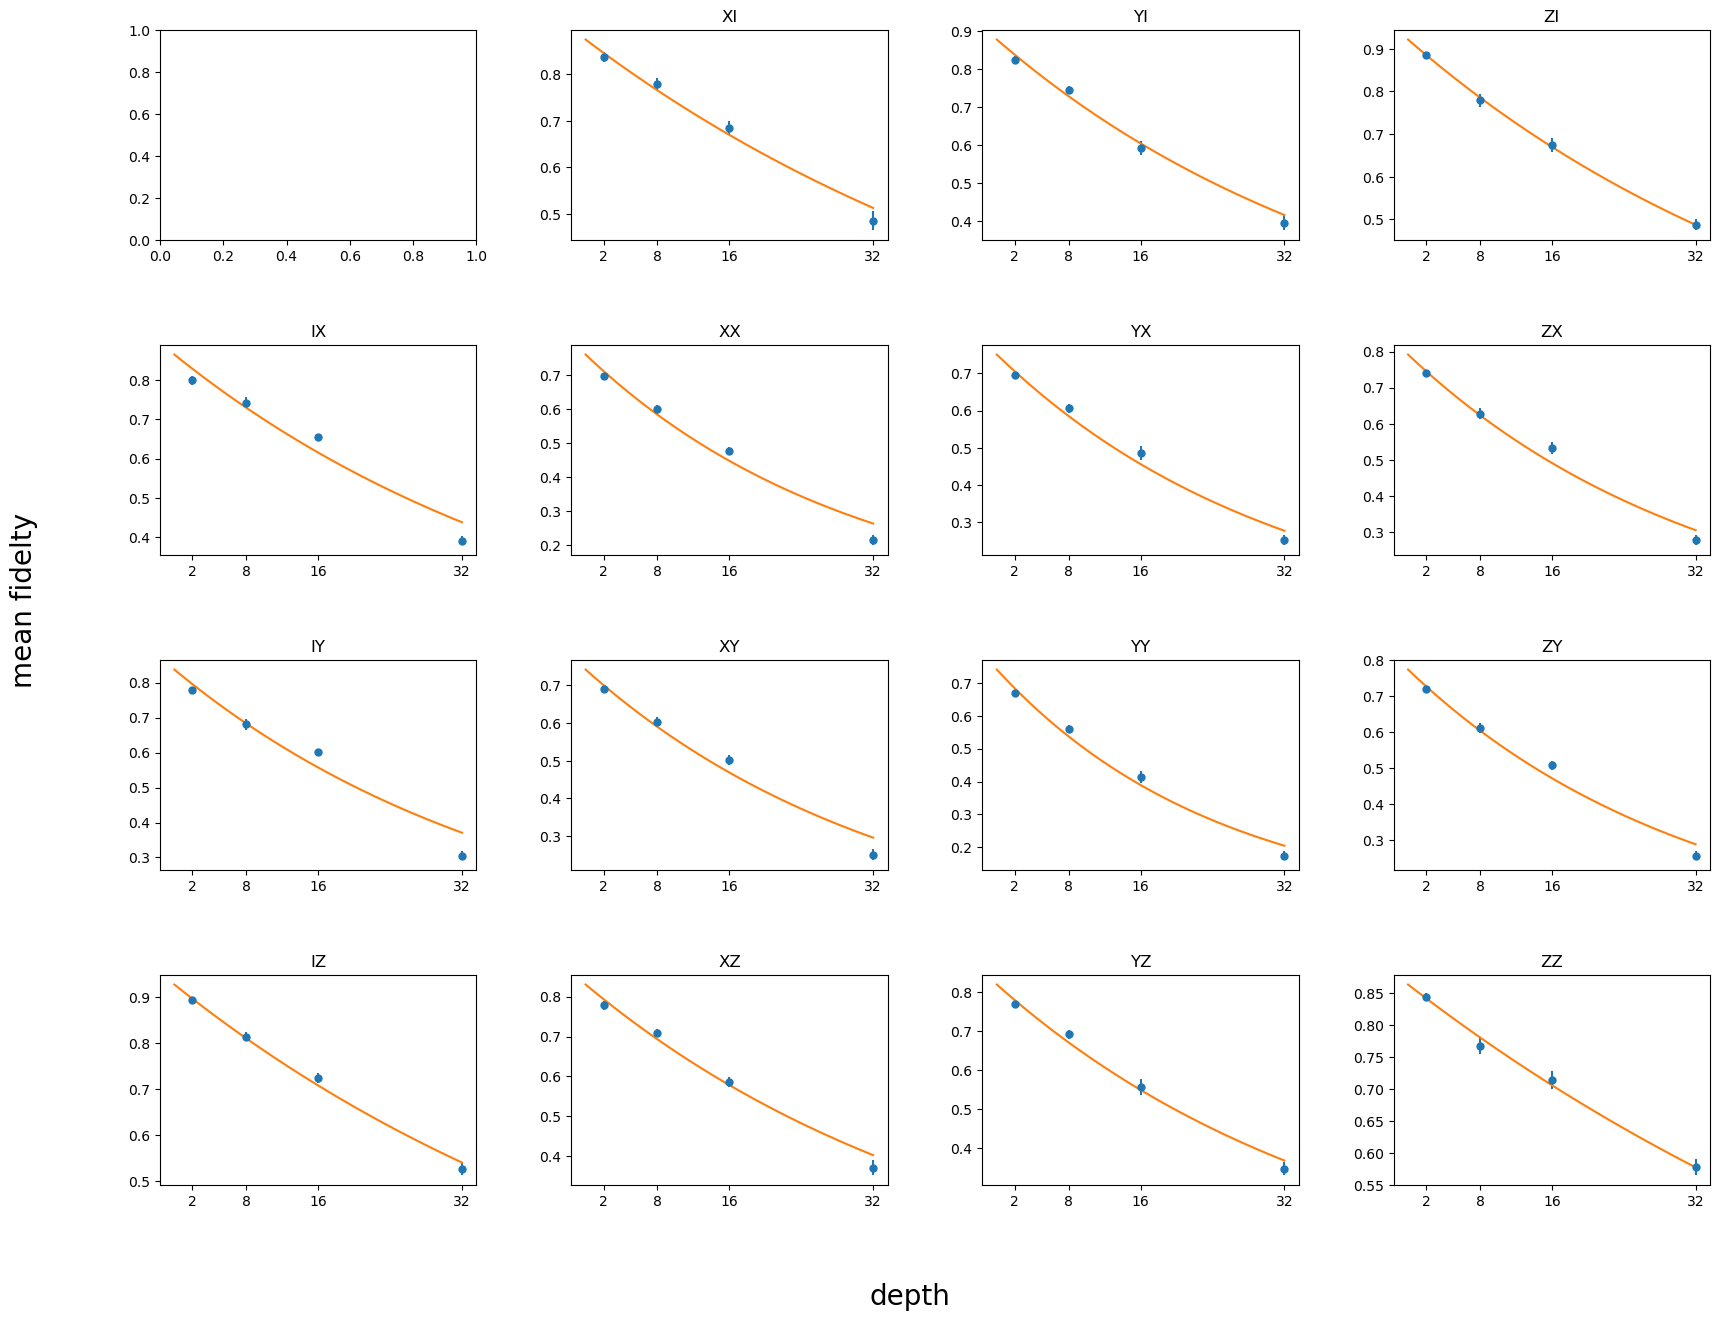

In [12]:

plot_full={}
plot_full=deepcopy(plot_dic)
err_full=deepcopy(error_dic)
# print (Y_full_dic)

x_c=np.linspace(0,32,num=80)
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
            pass
        else:
            axs[i, j].set_xticks(depth)   
            axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])
                
# for pauli_label in pauli_request_list:
# fig.savefig("fit.pdf", format="pdf", dpi=500)        
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(1-fidelity_list[pauli_label],7), round(stdev_list[pauli_label],7))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

plot fidelity from each circuit and fit

data analysis with bootstrapping

spam results

In [ ]:
# l=[1,2,3]
# a=3
# print (any([a==x for x in l]))